In [21]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as pyplot
import pickle
from matplotlib import style

In [22]:
data = pd.read_csv("data/student-mat.csv", sep=";")

In [23]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [24]:
data = data[["G1", "G2", "G3", "studytime", "failures", "absences"]]
#studytime: 1: <2 hours, 2: 2 to 5 hours, 3: 5 to 10 hours, or 4: >10 hours
#failures - number of past class failures (n if 1<=n<3, else 4)
#G1: First period grade(0-20), G2: Second period grade(0-20), G3: Final grade(0-20)

In [25]:
data.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [26]:
predict = "G3"

In [27]:
X = np.array(data.drop(predict, 1))
y = np.array(data[predict])

In [28]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)

In [29]:
#linear = linear_model.LinearRegression()

In [30]:
#linear.fit(X_train, y_train)

In [31]:
#accuracy = linear.score(X_test, y_test)

In [32]:
#accuracy

In [33]:
#linear.intercept_

In [34]:
#linear.coef_

In [35]:
#predictions = linear.predict(X_test)

In [36]:
#for i in range(20):
#    print("Prediction (rounded):" + str(round(predictions[i])) + " Data: " + str(y_test[i]))

### Saving the model, so we don't need to train every time and after that loading it and giving it a try to see if it works

In [37]:
with open("studentmodel.pickle", "wb") as f:
    pickle.dump(linear, f)

In [38]:
pickle_in = open("studentmodel.pickle", "rb")

In [39]:
linear = pickle.load(pickle_in)

In [40]:
accuracy = linear.score(X_test, y_test)

In [41]:
accuracy

0.8620968693032962

In [42]:
linear.intercept_

-1.6172583223635524

In [44]:
linear.coef_

array([ 0.14797232,  0.98767677, -0.15935043, -0.25002076,  0.03957127])

In [45]:
predictions = linear.predict(X_test)

In [46]:
for i in range(20):
    print("Prediction (rounded):" + str(round(predictions[i])) + " Data: " + str(y_test[i]))

Prediction (rounded):12 Data: 12
Prediction (rounded):13 Data: 12
Prediction (rounded):16 Data: 16
Prediction (rounded):9 Data: 10
Prediction (rounded):12 Data: 13
Prediction (rounded):8 Data: 8
Prediction (rounded):12 Data: 13
Prediction (rounded):15 Data: 16
Prediction (rounded):9 Data: 11
Prediction (rounded):8 Data: 8
Prediction (rounded):12 Data: 10
Prediction (rounded):19 Data: 18
Prediction (rounded):8 Data: 10
Prediction (rounded):-2 Data: 0
Prediction (rounded):16 Data: 16
Prediction (rounded):9 Data: 9
Prediction (rounded):7 Data: 0
Prediction (rounded):12 Data: 13
Prediction (rounded):15 Data: 15
Prediction (rounded):-1 Data: 0


### Looping to find the best accuracy and after finding it, saving the model that gaves it to the "studentmodel.pickle"

In [47]:
best = accuracy
for i in range(30):
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y, test_size=0.1)
    linear = linear_model.LinearRegression()
    linear.fit(X_train, y_train)
    new_accuracy = linear.score(X_test, y_test)
    if new_accuracy > best:
        best = new_accuracy
        with open("studentmodel.pickle", "wb") as f:
            pickle.dump(linear, f)

In [48]:
best

0.9609197339882605

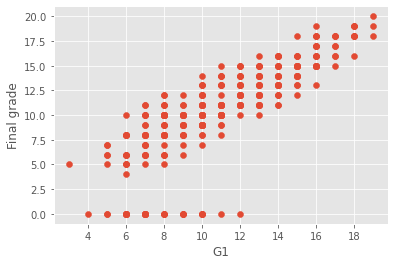

In [51]:
p = "G1"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()

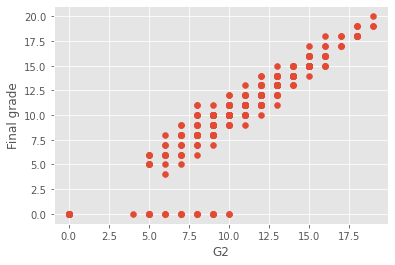

In [52]:
p = "G2"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()

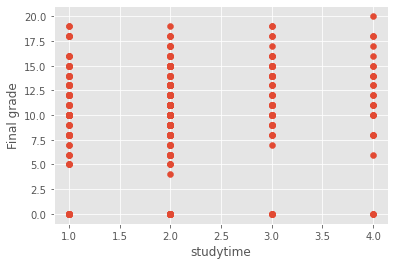

In [55]:
p = "studytime"
style.use("ggplot")
pyplot.scatter(data[p], data["G3"])
pyplot.xlabel(p)
pyplot.ylabel("Final grade")
pyplot.show()